<a href="https://colab.research.google.com/github/uomodellamansarda/DisneyMoviesAnalysis/blob/main/DisneyRevenuesStreamsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I analyzed the following dataset: 

https://data.world/kgarrett/disney-character-success-00-16

I copied on my repository https://github.com/uomodellamansarda/DisneyMoviesAnalysis/blob/main/disney_revenue_1991-2016.csv and added 2017 2018 and 2019 data from The Walt Disney Company Reports

As usual, I faced some data where missing or incorrectly interpreted by python. 

The output of this notebook is a set of plots showing the following information: 

1.  The Walt Disney Company Revenues
2.  Disney Park and Resort Revenue Contribution on Total Disney Revenue
3.  Disney Media (Disney Channel, ABC, etc) Revenue Contribution on Total Disney Revenue
4.  Disney Movie Revenue Contribution on Total Disney Revenue

They contribute to more than 80% of total revenues and It was interesting, in my opinion, to analyze how Movie Contribution reduced by the time.

The dataset stores:


1.   The Walt Disney Total Revenues
2.   Park And Resorts Contribution
3.   Network Contribution
4.   Studio/Movies Contribution
5.   Consumer Products and Interactive(videogames) contributions 

Through the years the company made some balance sheet reclassification, for example: 

In the 2019 report, they aggregated Consumer Products with Park and Resort budget line

https://thewaltdisneycompany.com/the-walt-disney-company-reports-fourth-quarter-and-full-year-earnings-
In the 2017 report, they aggregated Consumer Products and Interactive Media

https://thewaltdisneycompany.com/walt-disney-company-reports-fourth-quarter-full-year-earnings-fiscal-2017/

2018 Report 

https://thewaltdisneycompany.com/the-walt-disney-company-reports-fourth-quarter-and-full-year-earnings-for-fiscal-2018/

2015 Report
https://thewaltdisneycompany.com/app/uploads/q4-fy15-earnings.pdf


The authors of the dataset used import.io to scrape company data, but the original url is unknown.
Instead from 2017 I verified the datasource from The Walt Disney Company Reports


In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 5)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#the url where the data are located 
url1="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_stream2016_2019.csv"
url2="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_revenue_1991-2016.csv"
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
#it's important to highlight that in 2015 and 2019 
#The Walt Disney Company Reports
df1=pd.read_csv(url1)
#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
df2=pd.read_csv(url2)

In [3]:
#getting some information to understand 
#what kind of data cleaning operations 
#I need to do
print('df1 info')
print(df1.info())
print('df2 info')
print(df2.info())


print('df1 head')
print(df1.head())
print('df2 head')
print(df2.head())

df1 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   2016        5 non-null      float64
 2   2017        5 non-null      float64
 3   2018        5 non-null      float64
 4   2019        6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes
None
df2 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       25 non-null     float64
 2   Disney Consumer Products[NI 2]   24 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  12 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     floa

From this inspection I noticed that total_gross and inflation_adjusted_gross should be float and not object

In [4]:
#after an inspection we saw that we had to strip a comma 
#I discovered that 1996 value for Disney Media Network has a strange behaviour
#I changed manually but this is not the best way to change a value

df2['Disney Media Networks'][df2['Year']==1996]=4142


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
#I am changing to float type the Disney Media Network Column
df2['Disney Media Networks']= df2['Disney Media Networks'].replace(',', '')
df2['Disney Media Networks']= df2['Disney Media Networks'].astype(float)
print("1996  Park and media info")
print(df2[["Walt Disney Parks and Resorts", 'Disney Media Networks']][df2['Year']==1996])
print(df2[["Walt Disney Parks and Resorts", 'Disney Media Networks']][df2['Year']==1996].info())
print(type(df2['Disney Media Networks'][df2['Year']==1996].values))
print(df2['Disney Media Networks'][df2['Year']==1996])
#This way summing all the not a number values 
#I can check if everything is numerical
#If sum=0 I got only numbers
print(df2['Disney Media Networks'].isna().sum())
print(df2)

1996  Park and media info
   Walt Disney Parks and Resorts  Disney Media Networks
5                         4502.0                 4142.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 5 to 5
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Walt Disney Parks and Resorts  1 non-null      float64
 1   Disney Media Networks          1 non-null      float64
dtypes: float64(2)
memory usage: 24.0 bytes
None
<class 'numpy.ndarray'>
5    4142.0
Name: Disney Media Networks, dtype: float64
3
    Year  Studio Entertainment[NI 1]  ...  Disney Media Networks  Total
0   1991                      2593.0  ...                    NaN   6111
1   1992                      3115.0  ...                    NaN   7502
2   1993                      3673.4  ...                    NaN   8529
3   1994                      4793.0  ...                  359.0  10414
4   1995                      6

In [6]:
#we have to fill the Nan with 0

df1=df1.fillna(0)
df2=df2.fillna(0)

#df1 and df2 had different format
#in one case years were columns 
#and revenes streams rows
#in the other dataframe this order was swapped

#then we have to transpose the dataframe
df1_t=df1.T
df2_t=df2.T
print(df2_t.head())

print('Df1 Transpose Head')
print(df1_t)
print(df1_t.values[1:])

print('Df2 Transpose Head')
print(df2_t.head())

                                     0       1   ...       24       25
Year                             1991.0  1992.0  ...   2015.0   2016.0
Studio Entertainment[NI 1]       2593.0  3115.0  ...   7366.0   9441.0
Disney Consumer Products[NI 2]    724.0  1081.0  ...   4499.0      0.0
Disney Interactive[NI 3][Rev 1]     0.0     0.0  ...   1174.0      0.0
Walt Disney Parks and Resorts    2794.0  3306.0  ...  16162.0  16974.0

[5 rows x 26 columns]
Df1 Transpose Head
                                     0                               1  ...  \
Unnamed: 0  Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...   
2016                              9441                               0  ...   
2017                              8379                               0  ...   
2018                              9987                               0  ...   
2019                             11127                               0  ...   

                      8      9  
Unnamed: 0  Elimination 

In [7]:
#we create a new dataframe in order to clean the old one
new_index=df1.columns[1:].astype(int)
print(new_index)
new_columns=df1.iloc[:,0]
print(new_columns)
df_1_restored=pd.DataFrame(data=df1_t.values[1:],index=new_index,columns=new_columns)
df_1_restored = df_1_restored.rename_axis(index='Year',columns='Revenue Stream')
print(df_1_restored)

Int64Index([2016, 2017, 2018, 2019], dtype='int64')
0               Studio Entertainment[NI 1]
1           Disney Consumer Products[NI 2]
2          Disney Interactive[NI 3][Rev 1]
3    Consumer Products & Interactive Media
4            Walt Disney Parks and Resorts
5          Parks, Experiences and Products
6                    Disney Media Networks
7       Direct-to-Consumer & International
8                              Elimination
9                                    Total
Name: Unnamed: 0, dtype: object
Revenue Stream Studio Entertainment[NI 1] Disney Consumer Products[NI 2]  ...  \
Year                                                                      ...   
2016                                 9441                              0  ...   
2017                                 8379                              0  ...   
2018                                 9987                              0  ...   
2019                                11127                              0  ...   


In [8]:
new_columns=df2.iloc[:,1:].columns
new_index=df2.iloc[:-1,0]

new_values=df2.values[:-1,1:]
print("Printing new values")
print(new_values)
print(len(new_values))
print(new_values.shape)
print("New Columns Shape")
print(new_columns.shape)
print("new_index shape")
print(new_index.shape)
df_2_restored=pd.DataFrame(data=new_values,columns=new_columns,index=new_index)
print("Printing Df2 Restored head and info")
print(df_2_restored.tail())
print(df_2_restored.info())

Printing new values
[[ 2593.    724.      0.   2794.      0.   6111. ]
 [ 3115.   1081.      0.   3306.      0.   7502. ]
 [ 3673.4  1415.1     0.   3440.7     0.   8529. ]
 [ 4793.   1798.2     0.   3463.6   359.  10414. ]
 [ 6001.5  2150.      0.   3959.8   414.  12525. ]
 [    0.      0.      0.   4502.   4142.  18739. ]
 [ 6981.   3782.    174.   5014.   6522.  22473. ]
 [ 6849.   3193.    260.   5532.   7142.  22976. ]
 [ 6548.   3030.    206.   6106.   7512.  23402. ]
 [ 5994.   2602.    368.   6803.   9615.  25402. ]
 [ 7004.   2590.      0.   6009.   9569.  25790. ]
 [ 6465.   2440.      0.   6691.   9733.  25360. ]
 [ 7364.   2344.      0.   6412.  10941.  27061. ]
 [ 8713.   2511.      0.   7750.  11778.  30752. ]
 [ 7587.   2127.      0.   9023.  13207.  31944. ]
 [ 7529.   2193.      0.   9925.  14368.  34285. ]
 [ 7491.   2347.      0.  10626.  15046.  35510. ]
 [ 7348.   2415.    719.  11504.  15857.  37843. ]
 [ 6136.   2425.    712.  10667.  16209.  36149. ]
 [ 6701.   

In [9]:
#I converted to numeric all the elements of the restored df
df_2_restored=df_2_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
print(df_2_restored.head(7))
print(df_2_restored.tail())
print(df_2_restored.info())
print("We want to understand why Disney Media Networks is not a number and then change with 0")
print("Filtering the object")
df2_filter=df_2_restored[df_2_restored["Disney Media Networks"].isnull()]
print(df2_filter)
df_2_restored=df_2_restored.fillna(0)
print("Df2 Restored Info")
print(df_2_restored.info())
#we do the same with df_1_restored
df_1_restored=df_1_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
df_1_restored=df_1_restored.fillna(0)
#understanding df_1_restored and df_2_restored index datatype
print(type(df_1_restored.index))
print(df_1_restored.index.dtype)
print(type(df_2_restored.index))
print(df_2_restored.index.dtype)

      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
1991                      2593.0                           724.0  ...   
1992                      3115.0                          1081.0  ...   
1993                      3673.4                          1415.1  ...   
1994                      4793.0                          1798.2  ...   
1995                      6001.5                          2150.0  ...   
1996                         0.0                             0.0  ...   
1997                      6981.0                          3782.0  ...   

      Disney Media Networks    Total  
Year                                  
1991                    0.0   6111.0  
1992                    0.0   7502.0  
1993                    0.0   8529.0  
1994                  359.0  10414.0  
1995                  414.0  12525.0  
1996                 4142.0  18739.0  
1997                 6522.0  2

In [10]:
#
#I merged the two dataframe one with the data.world data
#and the other with the The Walt Disney Company Report Data (2017 2019)
#
df_merge=df_1_restored.merge(df_2_restored, how='outer',right_index=True,left_index=True)
print(df_merge.info())
print(df_merge.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1991 to 2019
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Studio Entertainment[NI 1]_x           4 non-null      float64
 1   Disney Consumer Products[NI 2]_x       4 non-null      float64
 2   Disney Interactive[NI 3][Rev 1]_x      4 non-null      float64
 3   Consumer Products & Interactive Media  4 non-null      float64
 4   Walt Disney Parks and Resorts_x        4 non-null      float64
 5   Parks, Experiences and Products        4 non-null      float64
 6   Disney Media Networks_x                4 non-null      float64
 7   Direct-to-Consumer & International     4 non-null      float64
 8   Elimination                            4 non-null      float64
 9   Total_x                                4 non-null      float64
 10  Studio Entertainment[NI 1]_y           25 non-null     float64
 11  Dis

In [11]:
#sorting by index 
#otherwise the sequence will follow 
#the merge order 2017-18-19->1991,92 [...]
df_merge_2=pd.concat([df_1_restored,df_2_restored]).sort_index()


In [12]:
print(df_merge_2.tail(12))
print(df_merge_2.info())


      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
2008                      7348.0                          2415.0  ...   
2009                      6136.0                          2425.0  ...   
2010                      6701.0                          2678.0  ...   
2011                      6351.0                          3049.0  ...   
2012                      5825.0                          3252.0  ...   
2013                      5979.0                          3555.0  ...   
2014                      7278.0                          3985.0  ...   
2015                      7366.0                          4499.0  ...   
2016                      9441.0                             0.0  ...   
2017                      8379.0                             0.0  ...   
2018                      9987.0                             0.0  ...   
2019                     11127.0                   

In [13]:
#x1,x2,x3 are revenues threshold
#that I use for better data viz
#20 Billions
x1=20000
#40 Billions
x2=40000
#60 Billions
x3=60000
#I want to segment data for "revenues intervals"
#but some years the had a decrease in revenues
#so I used two logic condition
#one based on revenue thresholds 
#one based on years intervals
b1=df_merge_2['Total'][df_merge_2['Total']<x1]
b2=df_merge_2['Total'][(df_merge_2.index>max(b1.index))&(df_merge_2['Total']<x2)]
b3=df_merge_2['Total'][(df_merge_2.index>max(b2.index))& (df_merge_2['Total']<x3)]
b4=df_merge_2['Total'][df_merge_2['Total']>=x3]
#checking if everything is ok
print(b1.head(3))
print(b2.head(3))
print("B3")
print(b3.head(3))
print(b4.head(3))
print(b1.tail(3))
print("b2 tail")
print(b2.tail(3))
print("B3 tail")
print(b3.tail(3))
print(b4.tail(3))

Year
1991    6111.0
1992    7502.0
1993    8529.0
Name: Total, dtype: float64
Year
1997    22473.0
1998    22976.0
1999    23402.0
Name: Total, dtype: float64
B3
Year
2011    40893.0
2012    42278.0
2013    45041.0
Name: Total, dtype: float64
Year
2019    69570.0
Name: Total, dtype: float64
Year
1994    10414.0
1995    12525.0
1996    18739.0
Name: Total, dtype: float64
b2 tail
Year
2008    37843.0
2009    36149.0
2010    38063.0
Name: Total, dtype: float64
B3 tail
Year
2016    55632.0
2017    55137.0
2018    59434.0
Name: Total, dtype: float64
Year
2019    69570.0
Name: Total, dtype: float64


[1991 1992 1993 1994 1995 1996]
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]
[2011 2012 2013 2014 2015 2016 2017 2018]
[2019]
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


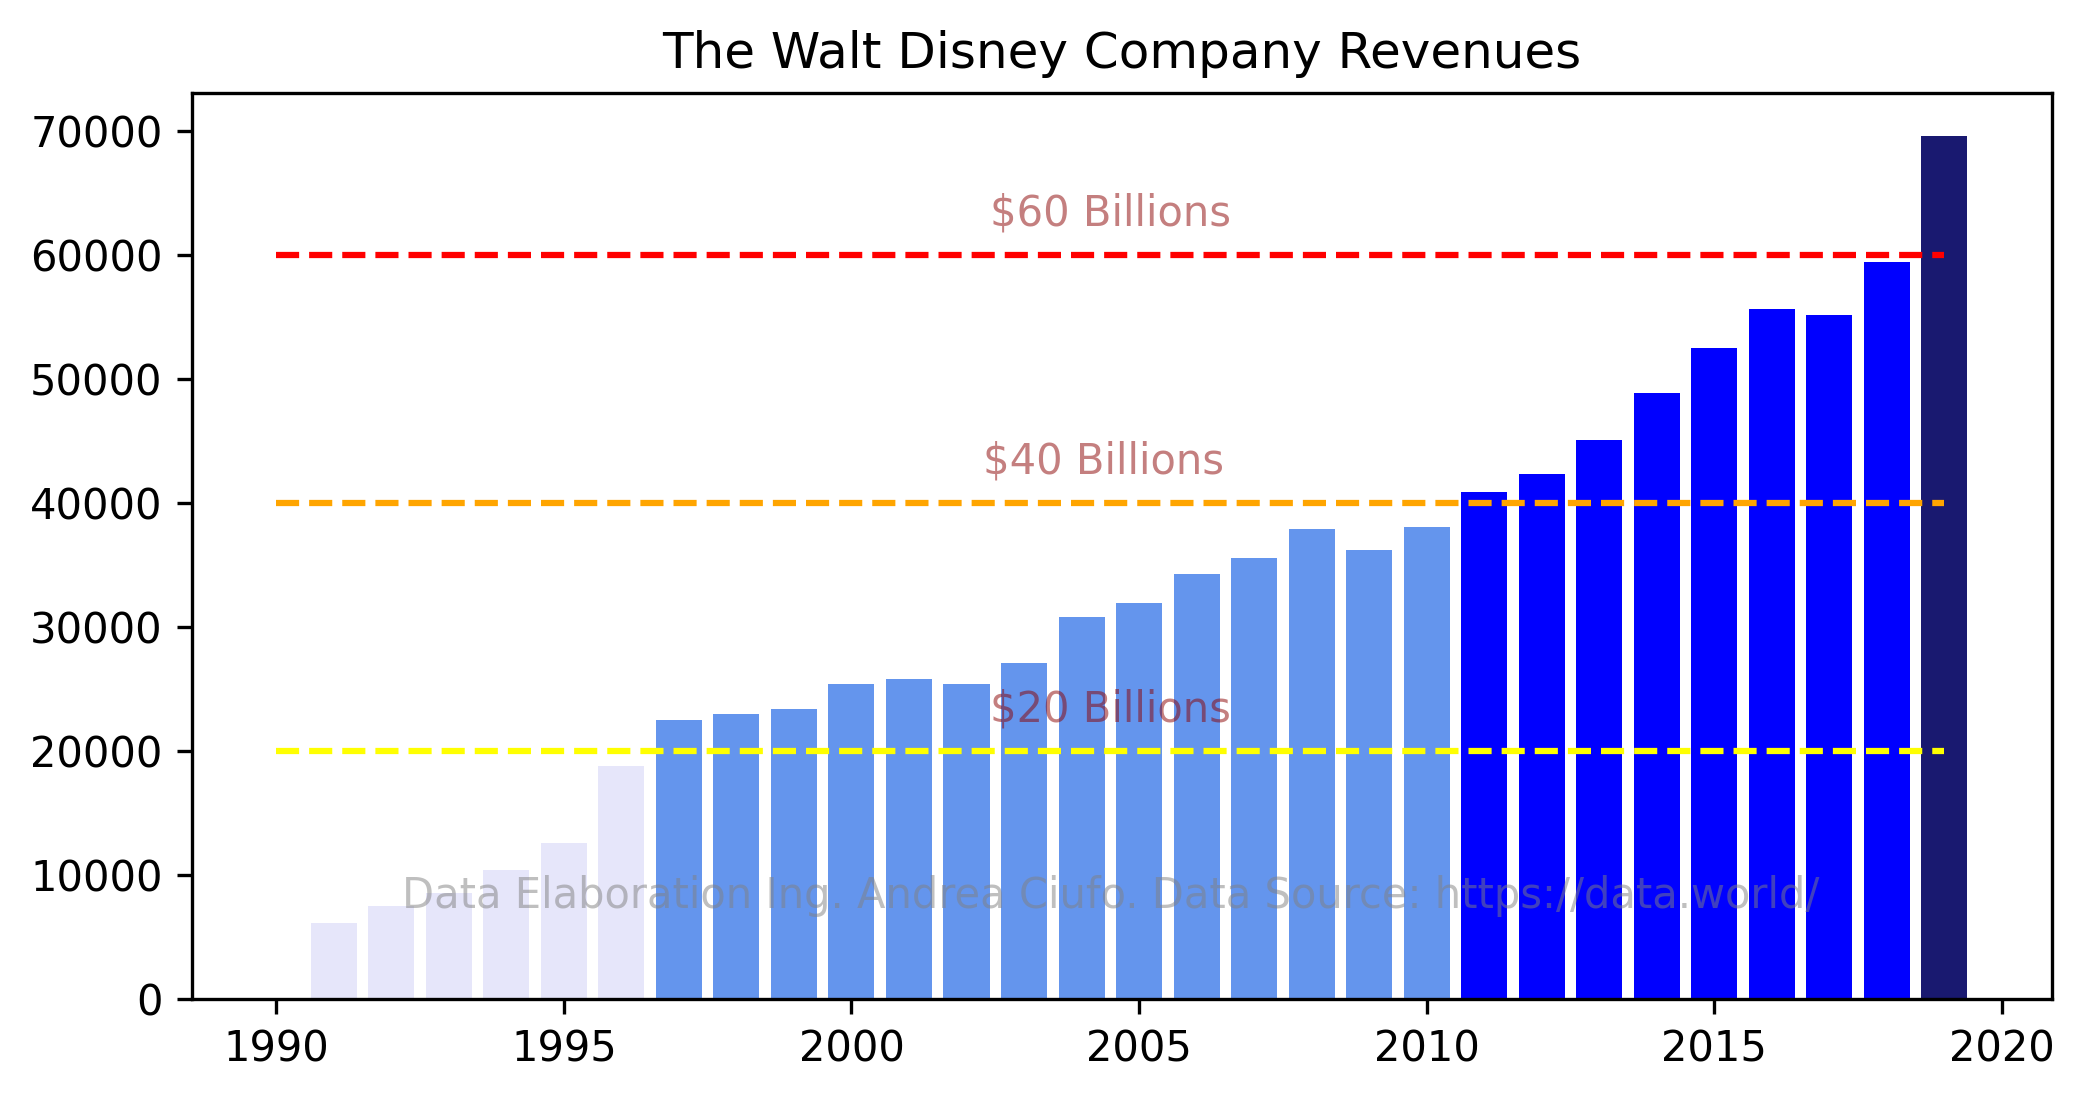

In [14]:
#getting x ticks position for our plot
b1x=np.arange(b1.index[0],b1.index[-1]+1)
b2x=np.arange(b2.index[0],b2.index[-1]+1)
b3x=np.arange(b3.index[0],b3.index[-1]+1)
b4x=np.arange(b4.index[0],b4.index[-1]+1)
y_range=np.arange(1990,2020)
print(b1x)
print(b2x)
print(b3x)
print(b4x)
y1=np.full(len(y_range),x1)
y2=np.full(len(y_range),x2)
y3=np.full(len(y_range),x3)
print(y_range)
#plot section
fig,ax=plt.subplots(figsize=(8,4),
                          facecolor='white', dpi=300)
#b1 b2 b3 b4 contains the total revenues
#divided by revenue range
#b1<20 $ billion
#20<b2<40 $ billion
#40<b3<60 $ billion
#60<b4 $ billion
ax.bar(b1x,b1,color="lavender")
ax.bar(b2x,b2,color="cornflowerblue")
ax.bar(b3x,b3,color="blue")
ax.bar(b4x,b4,color="midnightblue")

ax.plot(y_range,y1,'--',color="yellow")
ax.plot(y_range,y2,'--',color="orange")
ax.plot(y_range,y3,'--',color="red")
ax.set_title("The Walt Disney Company Revenues")
water_x=(min(y_range)+max(y_range))/2
water_y=max(y2)/4
plt.text(water_x, water_y, 'Data Elaboration Ing. Andrea Ciufo. Data Source: https://data.world/',
          fontsize=10, color='gray',
          ha='center', va='top', alpha=0.5)

plt.text(water_x, x1+5000, '$20 Billions',
          fontsize=10, color='darkred',
          ha='center', va='top', alpha=0.5)
plt.text(water_x, x2+5000, '$40 Billions ',
          fontsize=10, color='darkred',
          ha='center', va='top', alpha=0.5)
plt.text(water_x, x3+5000, '$60 Billions',
          fontsize=10, color='darkred',
          ha='center', va='top', alpha=0.5)

plt.show()


In [15]:
print(df_merge_2.columns)

Index(['Studio Entertainment[NI 1]', 'Disney Consumer Products[NI 2]',
       'Disney Interactive[NI 3][Rev 1]',
       'Consumer Products & Interactive Media',
       'Walt Disney Parks and Resorts', 'Parks, Experiences and Products',
       'Disney Media Networks', 'Direct-to-Consumer & International',
       'Elimination', 'Total'],
      dtype='object')


In this following section we analyze how in % the different revenue streams contribute to the total revenues. 
<p><b>For some of the balance lines we don't have 1996 data.</b> 

In [16]:

a='Studio Entertainment[NI 1]'
b='Walt Disney Parks and Resorts'
c='Parks, Experiences and Products'
d='Disney Media Networks'
#we want to create a check for two reason
# 1 is to understand if the total is consistent 
#total should always be greater than 
#the sum of the 4 selected revenue streams
# 2 we want to understand if there are some outlier
#evaluating in % values their contribution over the total

relevant_sum=df_merge_2[[a,b,c,d]].sort_index().sum(axis=1)
relevant_diff=relevant_sum-df_merge_2['Total']
diff_perc=((relevant_sum-df_merge_2['Total'])/df_merge_2['Total']*100).round(2)
print(diff_perc)
print(type(relevant_sum))
print(relevant_sum)
print(sum(relevant_diff>0))
print(df_merge_2[[a,b,c,d]].loc[1996])

Year
1991   -11.85
1992   -14.41
1993   -16.59
1994   -17.27
1995   -17.16
1996   -53.87
1997   -17.60
1998   -15.03
1999   -13.83
2000   -11.77
2001   -12.44
2002    -9.74
2003    -8.66
2004    -8.17
2005    -6.66
2006    -7.18
2007    -6.61
2008    -8.28
2009    -8.68
2010    -9.04
2011    -9.86
2012    -9.69
2013   -10.26
2014   -10.82
2015   -10.81
2016    -9.94
2017    -8.77
2018    -8.17
2019   -10.62
dtype: float64
<class 'pandas.core.series.Series'>
Year
1991     5387.0
1992     6421.0
1993     7114.1
1994     8615.6
1995    10375.3
1996     8644.0
1997    18517.0
1998    19523.0
1999    20166.0
2000    22412.0
2001    22582.0
2002    22889.0
2003    24717.0
2004    28241.0
2005    29817.0
2006    31822.0
2007    33163.0
2008    34709.0
2009    33012.0
2010    34624.0
2011    36862.0
2012    38181.0
2013    40422.0
2014    43529.0
2015    46792.0
2016    50104.0
2017    50304.0
2018    54579.0
2019    62179.0
dtype: float64
0
Studio Entertainment[NI 1]            0.0
Walt Disne

In [17]:
#we want to understand better what 
#we have 
#and what we are missing from 1996
#original dataframe and 
#not just the 4 selected balance lines
df_merge_2.loc[1996]

Studio Entertainment[NI 1]                   0.0
Disney Consumer Products[NI 2]               0.0
Disney Interactive[NI 3][Rev 1]              0.0
Consumer Products & Interactive Media        NaN
Walt Disney Parks and Resorts             4502.0
Parks, Experiences and Products              NaN
Disney Media Networks                     4142.0
Direct-to-Consumer & International           NaN
Elimination                                  NaN
Total                                    18739.0
Name: 1996, dtype: float64

In [18]:

df_merge_2=df_merge_2.fillna(0)
studio_entert=pd.DataFrame(df_merge_2['Studio Entertainment[NI 1]']).sort_index()
park_sum=df_merge_2['Walt Disney Parks and Resorts']+df_merge_2['Parks, Experiences and Products']
park_resort=pd.DataFrame(park_sum,columns=['park_resort']).sort_index()
disney_media_network=pd.DataFrame(df_merge_2['Disney Media Networks']).sort_index()

sub_total=df_merge_2['Studio Entertainment[NI 1]']+df_merge_2['Walt Disney Parks and Resorts']+df_merge_2['Parks, Experiences and Products']+disney_media_network#-df_merge_2['Total']


studio_entert['Total']=df_merge_2['Total']
park_resort['Total']=df_merge_2['Total']
disney_media_network['Total']=df_merge_2['Total']

studio_entert['studio_p']=round(studio_entert['Studio Entertainment[NI 1]']/studio_entert['Total']*100,2)
studio_entert['complementary']=100-studio_entert['studio_p']
park_resort['park_p']=round(park_resort.iloc[:,0]/park_resort['Total']*100,2)
park_resort['complementary']=100-park_resort['park_p']

disney_media_network['media_p']=round(disney_media_network.iloc[:,0]/disney_media_network['Total']*100,2)
disney_media_network['complementary']=100-disney_media_network['media_p']
print(studio_entert.tail())
print(park_resort.tail())
print(park_resort.head())
print(disney_media_network.head())
print(disney_media_network.tail())
#disney_media_network=park_resort.assign(df_merge_2['Total'])

      Studio Entertainment[NI 1]    Total  studio_p  complementary
Year                                                              
2015                      7366.0  52465.0     14.04          85.96
2016                      9441.0  55632.0     16.97          83.03
2017                      8379.0  55137.0     15.20          84.80
2018                      9987.0  59434.0     16.80          83.20
2019                     11127.0  69570.0     15.99          84.01
      park_resort    Total  park_p  complementary
Year                                             
2015      16162.0  52465.0   30.81          69.19
2016      16974.0  55632.0   30.51          69.49
2017      18415.0  55137.0   33.40          66.60
2018      20296.0  59434.0   34.15          65.85
2019      26225.0  69570.0   37.70          62.30
      park_resort    Total  park_p  complementary
Year                                             
1991       2794.0   6111.0   45.72          54.28
1992       3306.0   7502.0   44

In [19]:
#this function will plot the barpolot for the different balance lines 
#the default color for the main bar is midnight blue
#but you can change in pink, darkpink or magenta it is Disney! 
def bar_plot(x1,y1,y2,y_2_label='Compared Variable',title="You Forgot The Title",bar_col='midnightblue'):
  fig, ax = plt.subplots(figsize=(10,5),
                          facecolor='white', dpi=300)
  twenty=np.full(len(x1),20)
  forty=np.full(len(x1),40)

 

  ax.bar(x1, y1, label=y_2_label,color=bar_col)
  ax.bar(x1, y2,  color='lightgrey', bottom=y1,
       label='Other Revenue Streams',alpha=0.6)
  ax.set_ylabel('Revenues Contribution %')
  ax.plot(x1,twenty,'--',color='yellow',alpha=0.9)
  ax.plot(x1,forty,'--',color='red',alpha=0.9)
  ax.set_title(title)
  ax.legend()
  ax.yaxis.tick_left()
  ax.yaxis.set_ticks_position("both")
  water_x=(min(x1)+max(x1))/2
  water_y=max(y1)/3
  print(water_x)
  print(water_y)
  water_p=(min(x1)+max(x1))/2
  plt.text(water_x, water_y, 'Data Elaboration Ing. Andrea Ciufo. Data Source: https://data.world/',
          fontsize=10, color='gray',
          ha='center', va='top')
  plt.text(water_p+5.2, 20+5,'20%',
          fontsize=10, color='yellow',
          ha='center', va='top')
  plt.text(water_p+5.2, 40+5,'40%',
          fontsize=10, color='darkred',
          ha='center', va='top')
  plt.text(water_p-5.2, 20+5,'20%',
          fontsize=10, color='yellow',
          ha='center', va='top')
  plt.text(water_p-5.2, 40+5,'40%',
          fontsize=10, color='darkred',
          ha='center', va='top')
  plt.show()
  return

2005.0
15.24


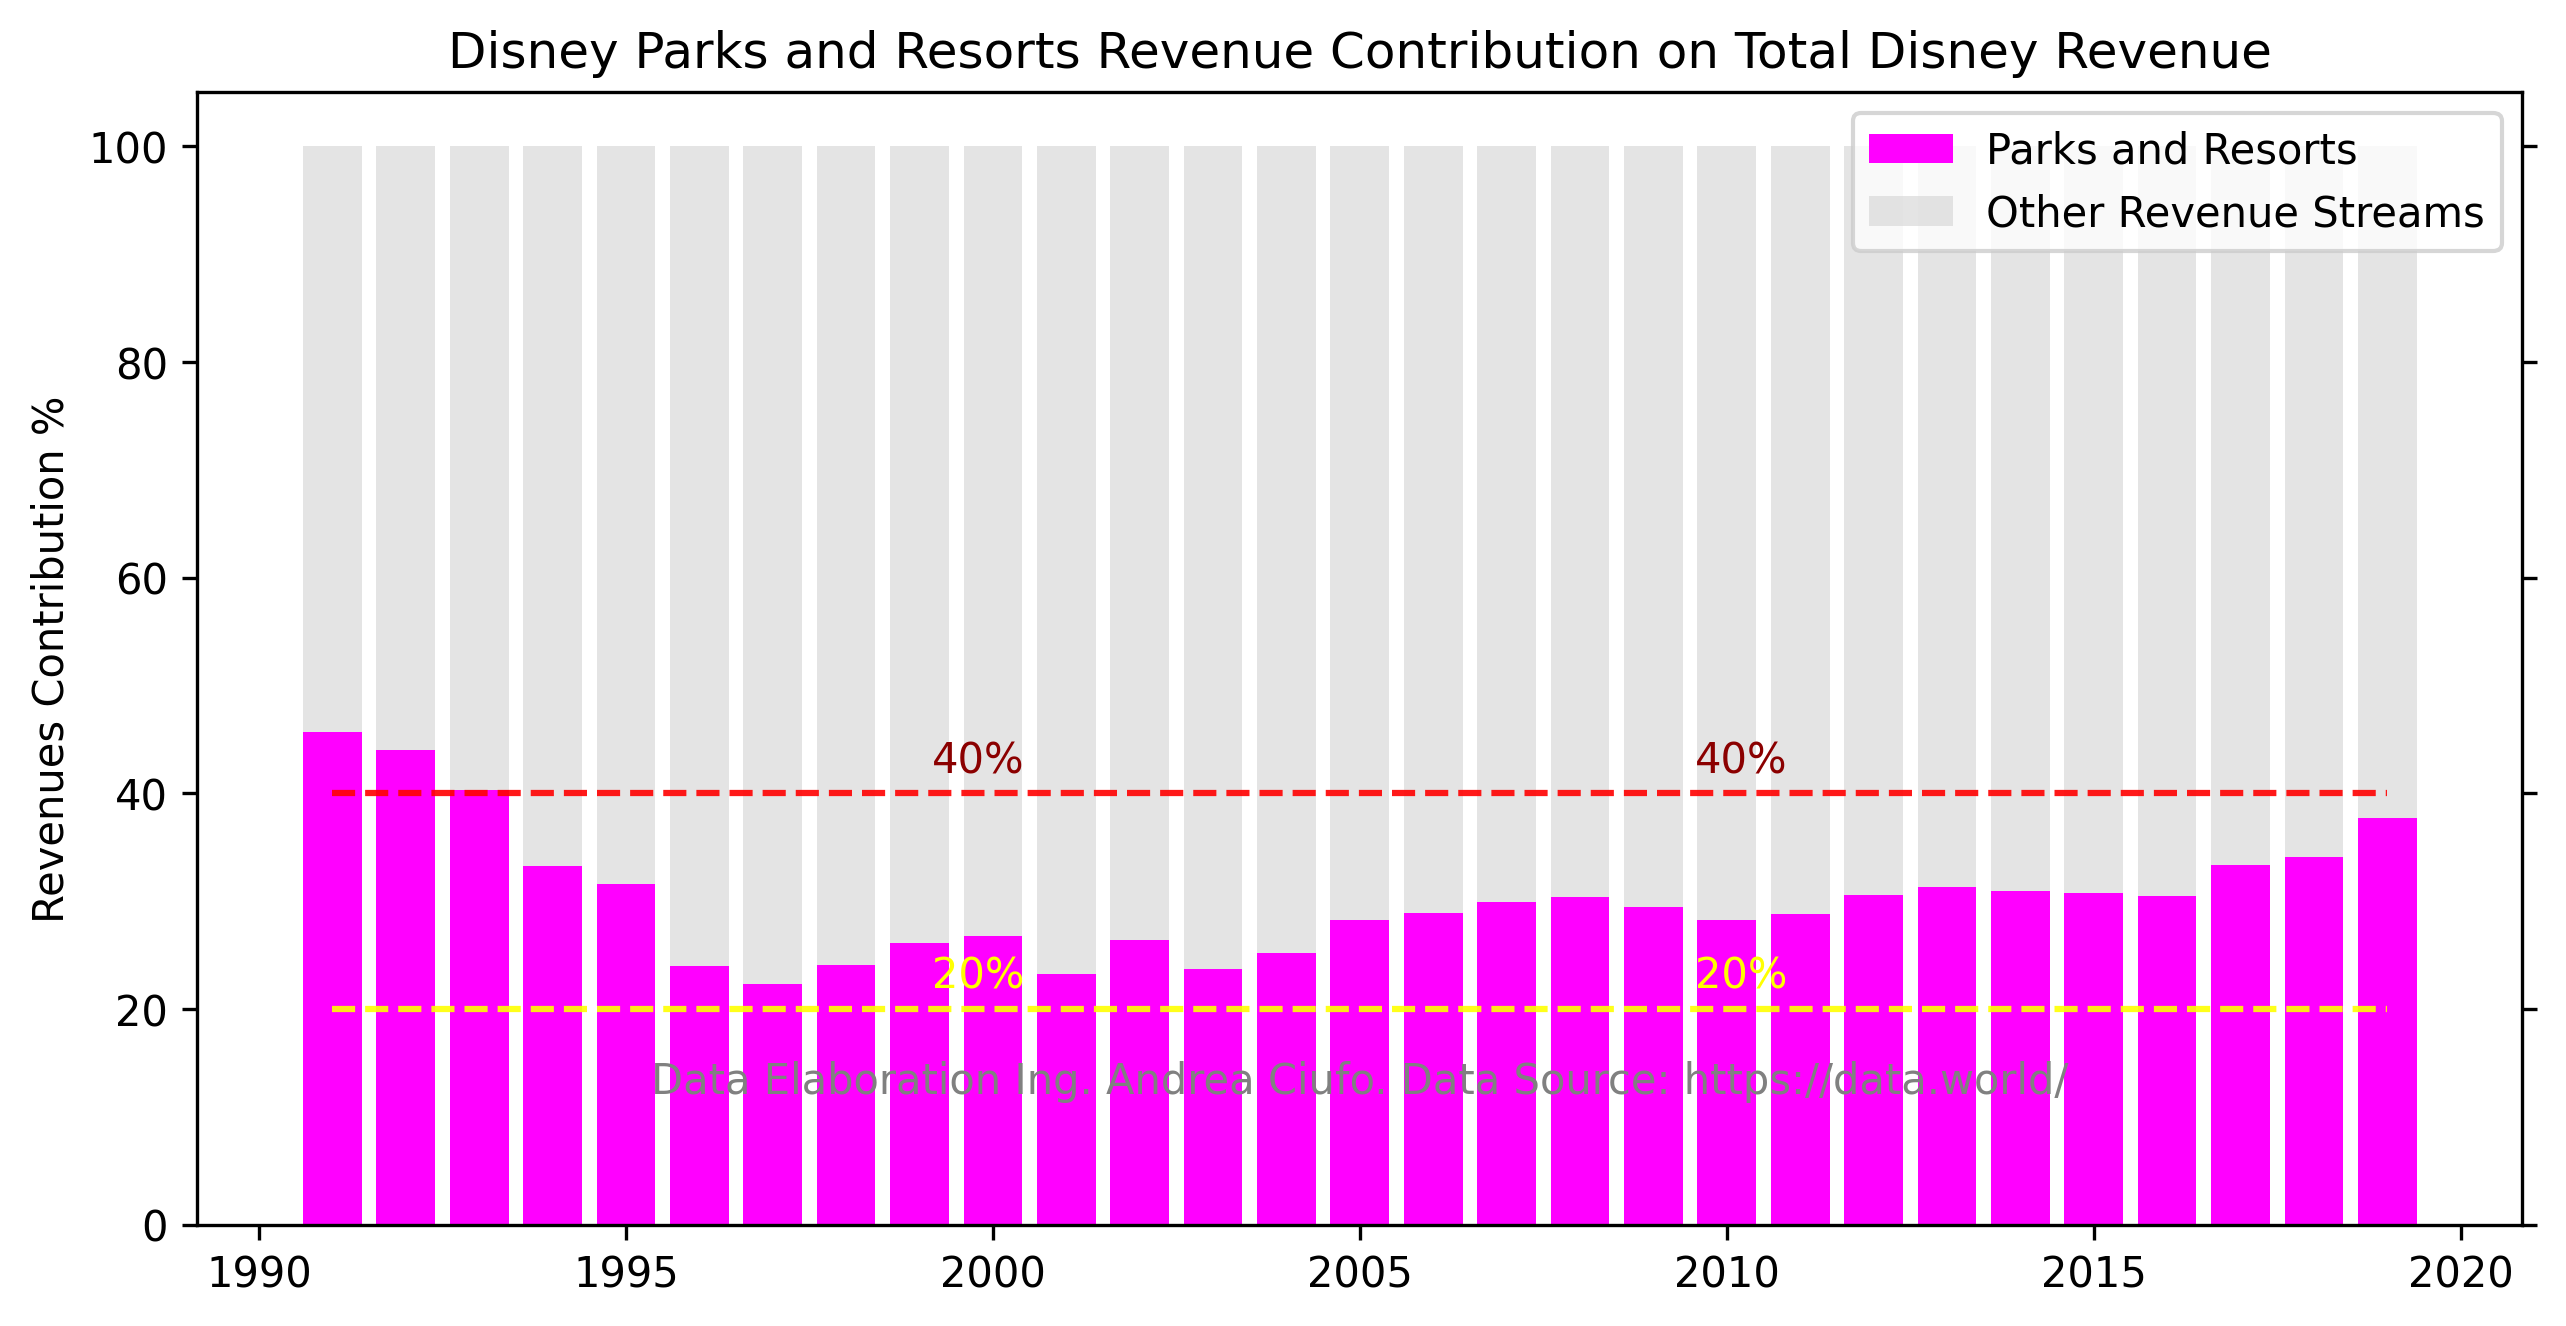

In [20]:
bar_plot(park_resort.index,park_resort['park_p'],
         park_resort['complementary'],y_2_label="Parks and Resorts",
         title='Disney Parks and Resorts Revenue Contribution on Total Disney Revenue',bar_col='magenta')


2005.0
15.973333333333334


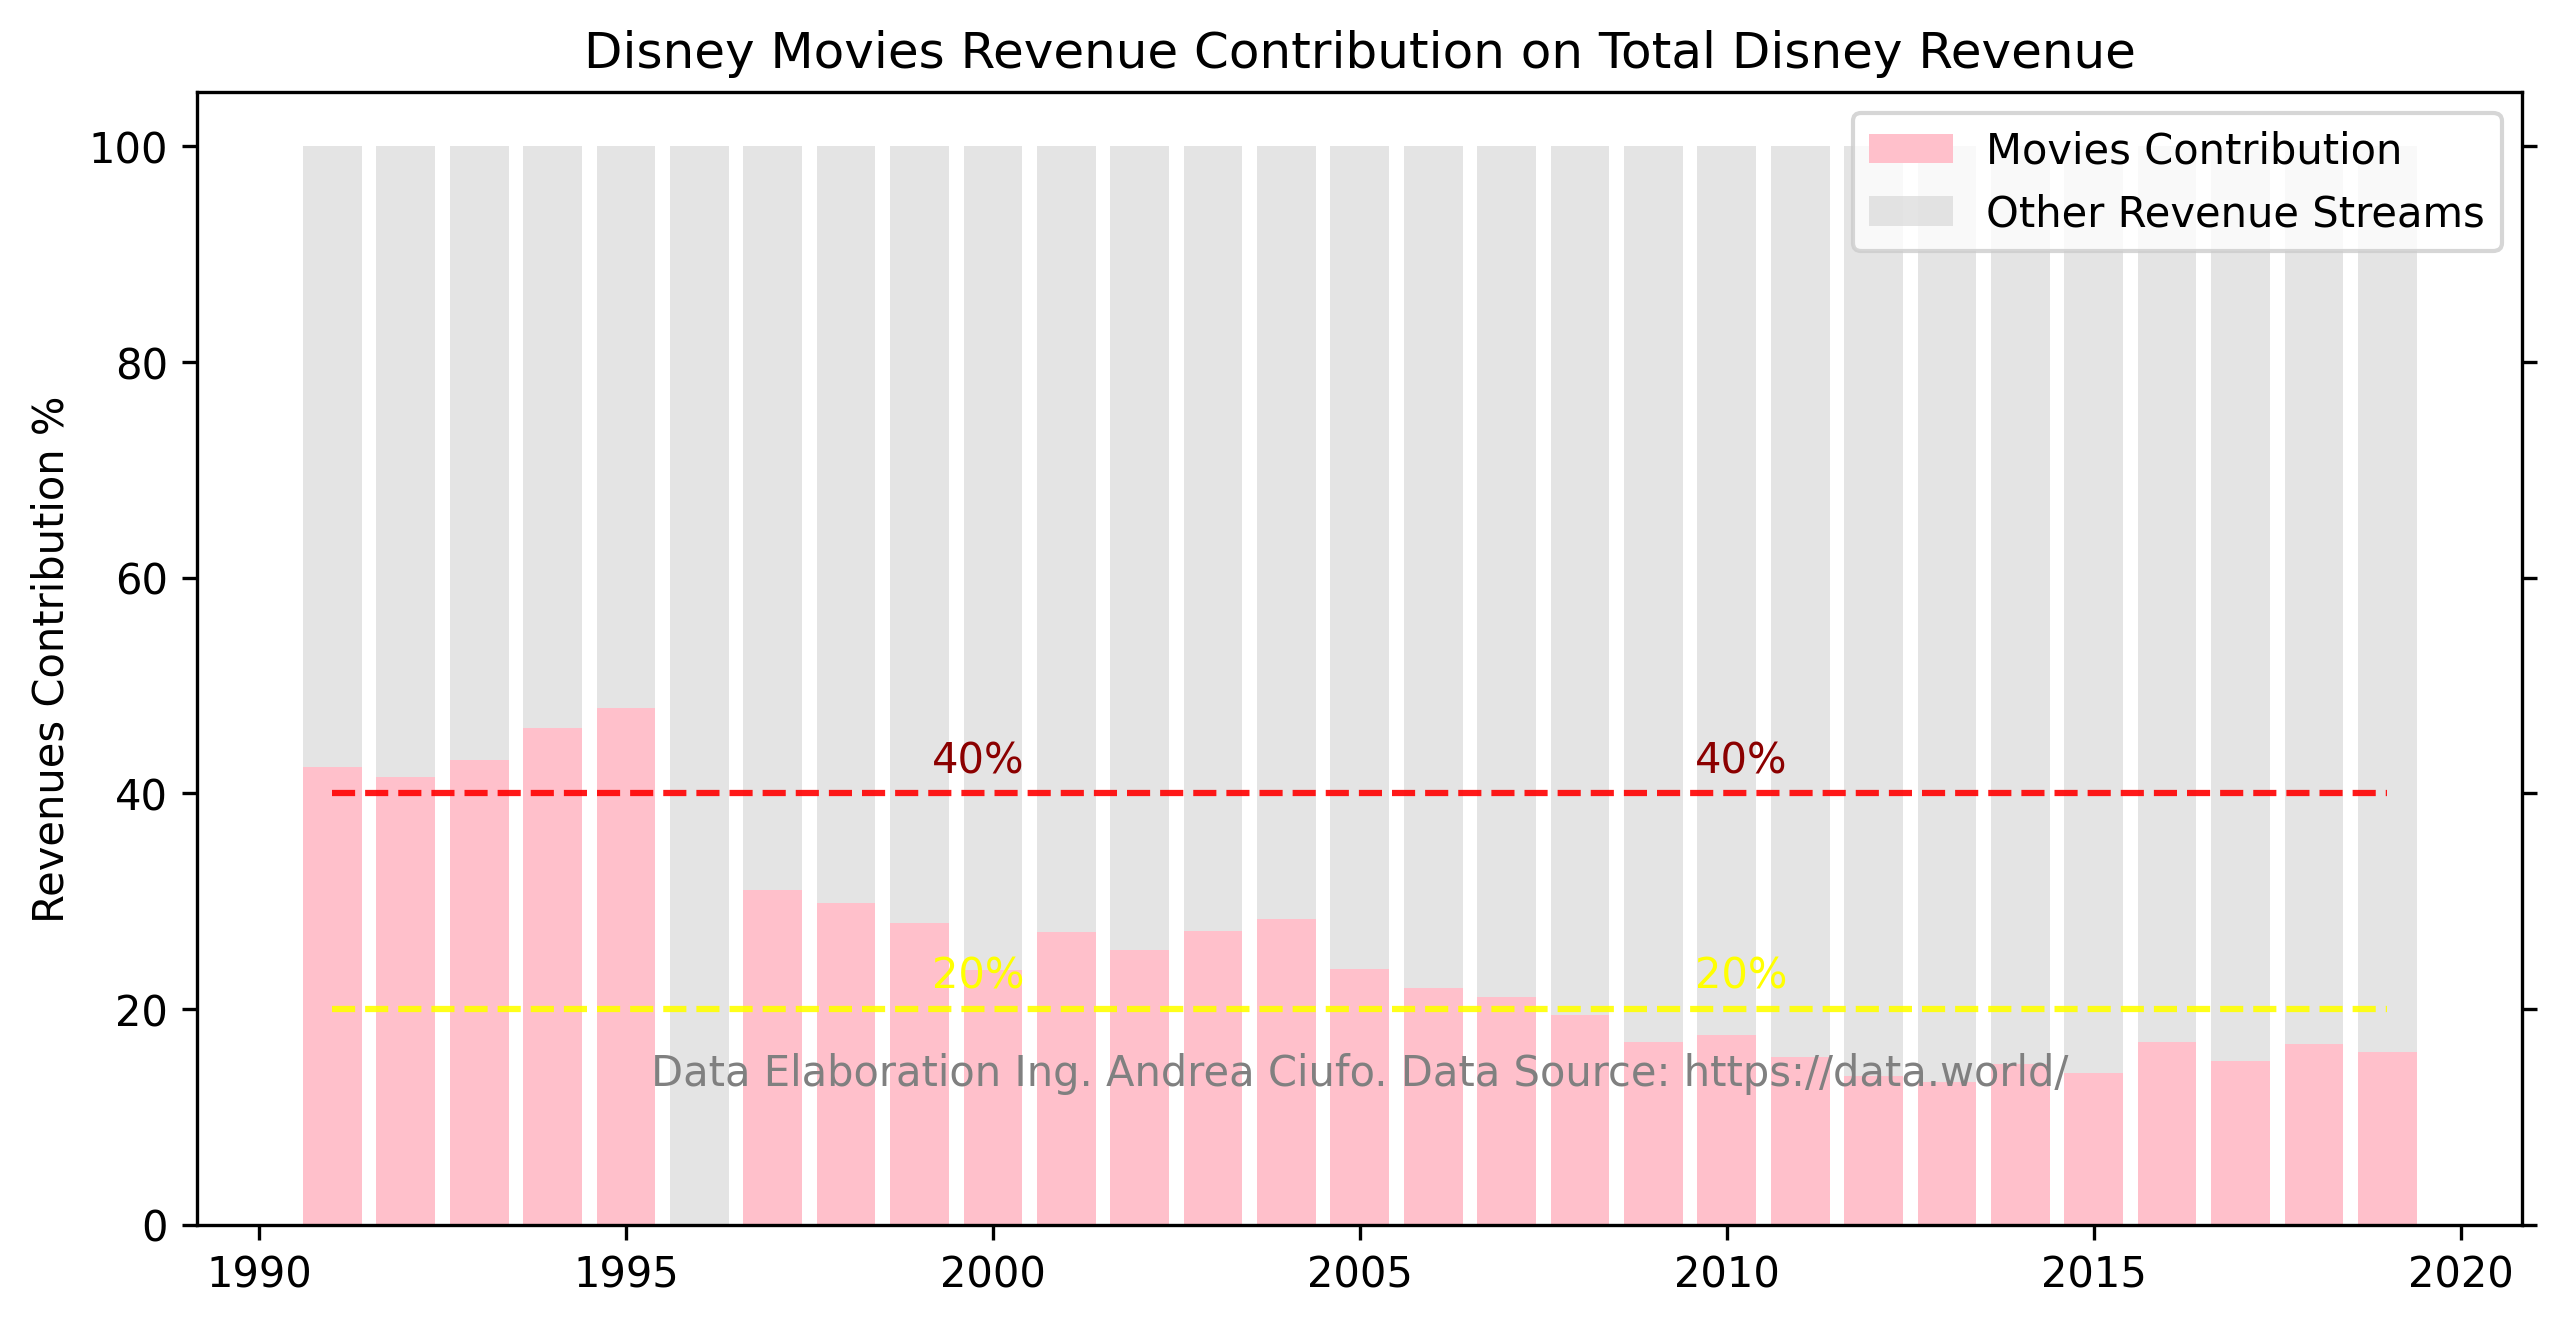

In [21]:

bar_plot(studio_entert.index,studio_entert['studio_p'],
         studio_entert['complementary'],y_2_label="Movies Contribution",
         title='Disney Movies Revenue Contribution on Total Disney Revenue',bar_col="pink")

2005.0
15.323333333333332


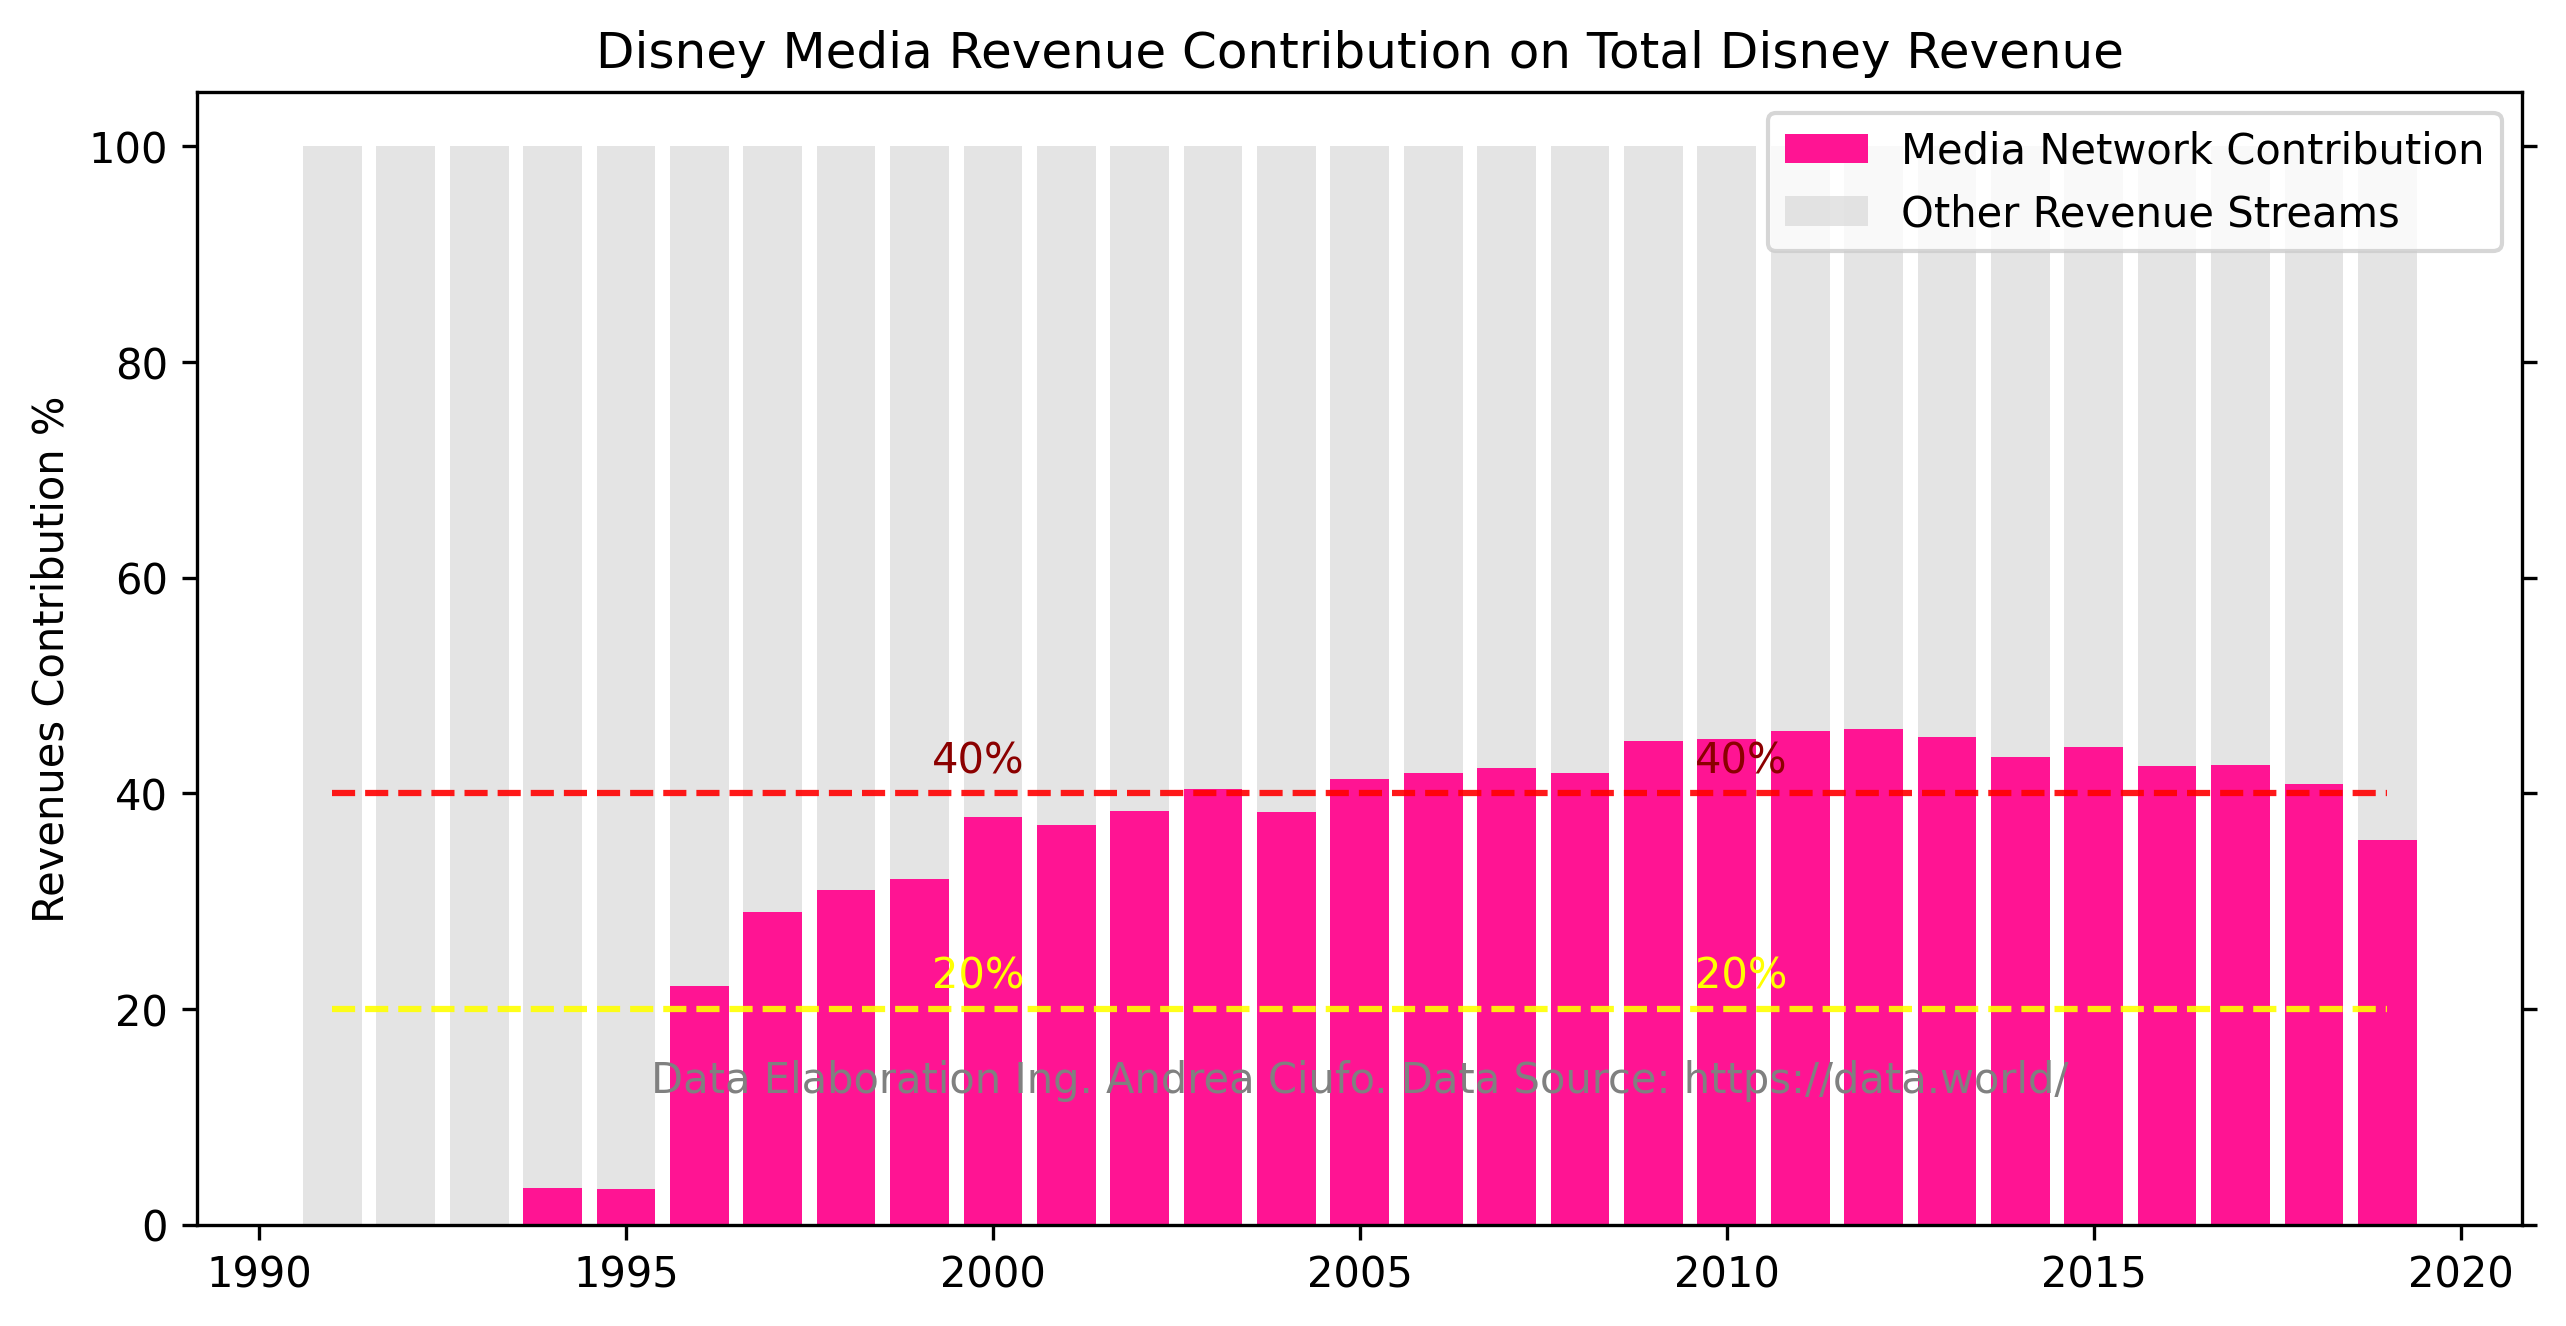

In [22]:
bar_plot(disney_media_network.index,disney_media_network['media_p'],
         disney_media_network['complementary'],y_2_label="Media Network Contribution",
         title='Disney Media Revenue Contribution on Total Disney Revenue',bar_col="deeppink")